In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_csv("survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [4]:
df = df.drop(columns = ['comments','state'])

In [5]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [6]:
df = df.replace({'work_interfere': {'Often':1,'Rarely':2,'Never':3,'Sometimes':4}})

In [7]:
df

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,1.0,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,NaN,No,No,2.0,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,2.0,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,1.0,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,3.0,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,1.0,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,4.0,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [8]:
df['work_interfere'] = df['work_interfere'].fillna(0)

In [9]:
df

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,1.0,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,NaN,No,No,2.0,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,2.0,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,1.0,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,3.0,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,0.0,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,1.0,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,4.0,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,0.0,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


<AxesSubplot:>

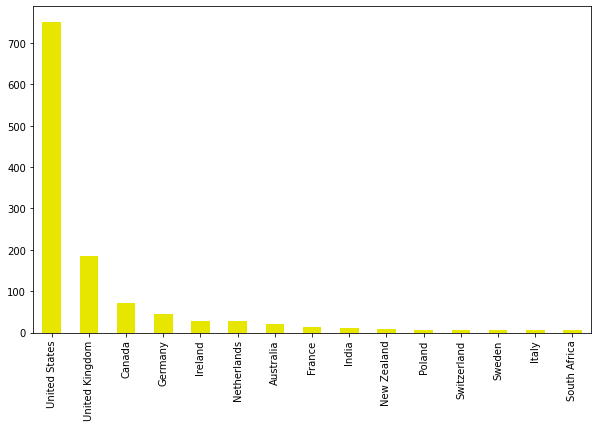

In [11]:
plt.rcParams["figure.figsize"] = [10.00, 6.00]
df['Country'].value_counts().head(15).plot(kind='bar',color='#e6e600')

In [12]:
df=df.dropna()
df

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,male,United States,Yes,Yes,No,4.0,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,2014-08-27 11:35:08,36,Male,France,Yes,Yes,No,0.0,6-25,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,4.0,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,male,United States,Yes,No,No,3.0,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,1.0,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,0.0,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,1.0,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,4.0,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,0.0,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,male,United States,Yes,Yes,No,4.0,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,2014-08-27 11:35:08,36,Male,France,Yes,Yes,No,0.0,6-25,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,4.0,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,male,United States,Yes,No,No,3.0,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,1.0,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,0.0,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,1.0,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,4.0,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,0.0,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [14]:
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year
df['day'] = df['Timestamp'].dt.day

In [15]:
df = df.drop(columns=['Timestamp'])
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,year,day
18,46,male,United States,Yes,Yes,No,4.0,1-5,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,8,2014,27
19,36,Male,France,Yes,Yes,No,0.0,6-25,Yes,Yes,...,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,8,2014,27
20,29,Male,United States,No,Yes,Yes,4.0,100-500,No,Yes,...,No,Some of them,Some of them,No,No,No,No,8,2014,27
21,31,male,United States,Yes,No,No,3.0,1-5,Yes,Yes,...,No,Some of them,Some of them,No,Maybe,Yes,No,8,2014,27
22,46,Male,United States,No,No,Yes,1.0,26-100,Yes,Yes,...,No,Some of them,Yes,No,Maybe,No,No,8,2014,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,0.0,26-100,No,Yes,...,No,Some of them,Some of them,No,No,Don't know,No,9,2015,12
1255,32,Male,United States,No,Yes,Yes,1.0,26-100,Yes,Yes,...,No,Some of them,Yes,No,No,Yes,No,9,2015,26
1256,34,male,United States,No,Yes,Yes,4.0,More than 1000,No,Yes,...,Yes,No,No,No,No,No,No,11,2015,7
1257,46,f,United States,No,No,No,0.0,100-500,Yes,Yes,...,No,No,No,No,No,No,No,11,2015,30


In [16]:
df['Age'].unique()

array([         46,          36,          29,          31,          41,
                33,          35,          34,          37,          32,
                30,          42,          40,          27,          38,
                50,          24,          18,          28,          26,
                22,          44,          23,          19,          25,
                39,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [17]:
df = df[df.Age>0]
df.Age.unique()

array([         46,          36,          29,          31,          41,
                33,          35,          34,          37,          32,
                30,          42,          40,          27,          38,
                50,          24,          18,          28,          26,
                22,          44,          23,          19,          25,
                39,          45,          21,          43,          56,
                60,          54,         329,          55, 99999999999,
                48,          20,          57,          58,          47,
                62,          51,          65,          49,           5,
                53,          61,           8,          11,          72],
      dtype=int64)

In [18]:
df = df[df.Age!=99999999999]
df = df[df.Age!=329]
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,year,day
18,46,male,United States,Yes,Yes,No,4.0,1-5,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,8,2014,27
19,36,Male,France,Yes,Yes,No,0.0,6-25,Yes,Yes,...,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,8,2014,27
20,29,Male,United States,No,Yes,Yes,4.0,100-500,No,Yes,...,No,Some of them,Some of them,No,No,No,No,8,2014,27
21,31,male,United States,Yes,No,No,3.0,1-5,Yes,Yes,...,No,Some of them,Some of them,No,Maybe,Yes,No,8,2014,27
22,46,Male,United States,No,No,Yes,1.0,26-100,Yes,Yes,...,No,Some of them,Yes,No,Maybe,No,No,8,2014,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,0.0,26-100,No,Yes,...,No,Some of them,Some of them,No,No,Don't know,No,9,2015,12
1255,32,Male,United States,No,Yes,Yes,1.0,26-100,Yes,Yes,...,No,Some of them,Yes,No,No,Yes,No,9,2015,26
1256,34,male,United States,No,Yes,Yes,4.0,More than 1000,No,Yes,...,Yes,No,No,No,No,No,No,11,2015,7
1257,46,f,United States,No,No,No,0.0,100-500,Yes,Yes,...,No,No,No,No,No,No,No,11,2015,30


In [19]:
mapYN = {'Yes':1,'No':0,'Maybe':2,'Don\'t know':2,'Not sure':2,'Some of them':2}

In [20]:
df = df.replace({'self_employed':mapYN,'family_history':mapYN,
                 'treatment':mapYN,'remote_work':mapYN,'tech_company':mapYN,
                 'benefits':mapYN,'care_options':mapYN,'wellness_program':mapYN,
                 'seek_help':mapYN,'anonymity':mapYN,'mental_health_consequence':mapYN,
                 'phys_health_consequence':mapYN,'coworkers':mapYN,'supervisor':mapYN,
                 'mental_health_interview':mapYN,'phys_health_interview':mapYN,
                 'mental_vs_physical':mapYN,'obs_consequence':mapYN})

In [21]:
df.dtypes

Age                            int64
Gender                        object
Country                       object
self_employed                  int64
family_history                 int64
treatment                      int64
work_interfere               float64
no_employees                  object
remote_work                    int64
tech_company                   int64
benefits                       int64
care_options                   int64
wellness_program               int64
seek_help                      int64
anonymity                      int64
leave                         object
mental_health_consequence      int64
phys_health_consequence        int64
coworkers                      int64
supervisor                     int64
mental_health_interview        int64
phys_health_interview          int64
mental_vs_physical             int64
obs_consequence                int64
month                          int64
year                           int64
day                            int64
d

In [22]:
df.Gender = df.Gender.replace(to_replace="^[m/M]",value=1,regex=True)
df.Gender = df.Gender.replace(to_replace="^[f/F/W/w]",value=2,regex=True)
df.Gender.unique()

array([1, 2, 'Trans-female', 'Cis Female', 'something kinda male?',
       'Cis Male', 'queer/she/they', 'non-binary', 'Nah', 'Enby',
       'Genderqueer', 'Androgyne', 'Agender', 'cis-female/femme',
       'Guy (-ish) ^_^', 'Trans woman', 'Neuter', 'queer', 'cis male',
       'A little about you', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [23]:
df.Gender = df.Gender.replace(to_replace="^[A-Z/a-z]",value=3,regex=True)
df.Gender.unique()

array([1, 2, 3], dtype=object)

In [24]:
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes

Age                            int64
Gender                         int64
Country                       object
self_employed                  int64
family_history                 int64
treatment                      int64
work_interfere               float64
no_employees                  object
remote_work                    int64
tech_company                   int64
benefits                       int64
care_options                   int64
wellness_program               int64
seek_help                      int64
anonymity                      int64
leave                         object
mental_health_consequence      int64
phys_health_consequence        int64
coworkers                      int64
supervisor                     int64
mental_health_interview        int64
phys_health_interview          int64
mental_vs_physical             int64
obs_consequence                int64
month                          int64
year                           int64
day                            int64
d

In [25]:
df = df.reset_index()

In [26]:
df = df.drop(columns = ('index'))
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,year,day
0,46,1,United States,1,1,0,4.0,1-5,1,1,...,0,1,1,0,1,1,1,8,2014,27
1,36,1,France,1,1,0,0.0,6-25,1,1,...,0,2,2,2,2,2,0,8,2014,27
2,29,1,United States,0,1,1,4.0,100-500,0,1,...,0,2,2,0,0,0,0,8,2014,27
3,31,1,United States,1,0,0,3.0,1-5,1,1,...,0,2,2,0,2,1,0,8,2014,27
4,46,1,United States,0,0,1,1.0,26-100,1,1,...,0,2,1,0,2,0,0,8,2014,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,26,1,United Kingdom,0,0,1,0.0,26-100,0,1,...,0,2,2,0,0,2,0,9,2015,12
1232,32,1,United States,0,1,1,1.0,26-100,1,1,...,0,2,1,0,0,1,0,9,2015,26
1233,34,1,United States,0,1,1,4.0,More than 1000,0,1,...,1,0,0,0,0,0,0,11,2015,7
1234,46,2,United States,0,0,0,0.0,100-500,1,1,...,0,0,0,0,0,0,0,11,2015,30


In [27]:
df.no_employees = df.no_employees.replace({'More than 1000':'1000'})
df.no_employees.unique()

array(['1-5', '6-25', '100-500', '26-100', '1000', '500-1000'],
      dtype=object)

In [28]:
for i in range(len(df.no_employees)):
    numbers = [int(s) for s in df.no_employees[i].split('-')]
    df.no_employees[i] = sum(numbers)/len(numbers)
df.no_employees.unique()

array([3.0, 15.5, 300.0, 63.0, 1000.0, 750.0], dtype=object)

In [29]:
df.no_employees = pd.to_numeric(df.no_employees)
df.dtypes

Age                            int64
Gender                         int64
Country                       object
self_employed                  int64
family_history                 int64
treatment                      int64
work_interfere               float64
no_employees                 float64
remote_work                    int64
tech_company                   int64
benefits                       int64
care_options                   int64
wellness_program               int64
seek_help                      int64
anonymity                      int64
leave                         object
mental_health_consequence      int64
phys_health_consequence        int64
coworkers                      int64
supervisor                     int64
mental_health_interview        int64
phys_health_interview          int64
mental_vs_physical             int64
obs_consequence                int64
month                          int64
year                           int64
day                            int64
d

In [30]:
df = pd.concat([df,pd.get_dummies(df.leave),pd.get_dummies(df.Country)],axis=1)
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
0,46,1,United States,1,1,0,4.0,3.0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,36,1,France,1,1,0,0.0,15.5,1,1,...,0,0,0,0,0,0,0,0,0,0
2,29,1,United States,0,1,1,4.0,300.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,31,1,United States,1,0,0,3.0,3.0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,46,1,United States,0,0,1,1.0,63.0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,26,1,United Kingdom,0,0,1,0.0,63.0,0,1,...,0,0,0,0,0,0,0,1,0,0
1232,32,1,United States,0,1,1,1.0,63.0,1,1,...,0,0,0,0,0,0,0,0,1,0
1233,34,1,United States,0,1,1,4.0,1000.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1234,46,2,United States,0,0,0,0.0,300.0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
df = df.drop(columns = ['Country','leave'])
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
0,46,1,1,1,0,4.0,3.0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,36,1,1,1,0,0.0,15.5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29,1,0,1,1,4.0,300.0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,31,1,1,0,0,3.0,3.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,46,1,0,0,1,1.0,63.0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,26,1,0,0,1,0.0,63.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1232,32,1,0,1,1,1.0,63.0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1233,34,1,0,1,1,4.0,1000.0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1234,46,2,0,0,0,0.0,300.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df.dtypes

Age               int64
Gender            int64
self_employed     int64
family_history    int64
treatment         int64
                  ...  
Switzerland       uint8
Thailand          uint8
United Kingdom    uint8
United States     uint8
Uruguay           uint8
Length: 77, dtype: object

In [33]:
# covMatrix = df.cov()
# sns.heatmap(covMatrix,annot=True,fmt='g')
# plt.show()
df.loc[:,].cov()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
Age,54.655860,-0.361880,0.143752,0.023026,0.278527,0.693542,433.346362,0.484059,-0.160547,-0.259196,...,0.007277,-1.052894e-02,0.019417,-1.622054e-03,-0.029168,-0.012164,6.475112e-03,-0.150274,0.609405,-4.860920e-03
Gender,-0.361880,0.211566,-0.000975,0.029659,0.045438,0.053323,13.303305,0.000305,-0.013238,0.010843,...,-0.000747,-1.867065e-04,-0.000311,6.230101e-04,0.000312,-0.000497,-1.867065e-04,-0.003211,0.021911,-1.867065e-04
self_employed,0.143752,-0.000975,0.103015,0.000590,0.002673,0.015282,-32.141083,0.047160,0.009795,-0.054935,...,-0.000377,-9.433591e-05,0.001053,-9.433591e-05,-0.000660,0.000149,7.153807e-04,0.005503,-0.024991,-9.433591e-05
family_history,0.023026,0.029659,0.000590,0.238263,0.092433,0.152069,5.446410,0.004522,-0.009284,0.003323,...,-0.000456,-3.164184e-04,0.000531,4.932982e-04,-0.000595,0.000214,-3.164184e-04,-0.011434,0.028338,-3.164184e-04
treatment,0.278527,0.045438,0.002673,0.092433,0.250179,0.304280,3.575009,0.006250,-0.006407,-0.036162,...,-0.000825,4.009276e-04,0.000786,-4.087890e-04,-0.001242,-0.000432,-4.087890e-04,-0.001525,0.023419,-4.087890e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Switzerland,-0.012164,-0.000497,0.000149,0.000214,-0.000432,-0.002901,0.947531,-0.001683,0.001027,-0.000961,...,-0.000018,-4.585774e-06,-0.000028,-4.585774e-06,-0.000032,0.005636,-4.585774e-06,-0.000835,-0.003380,-4.585774e-06
Thailand,0.006475,-0.000187,0.000715,-0.000316,-0.000409,0.000511,-0.248733,-0.000240,0.000147,-0.000831,...,-0.000003,-6.551105e-07,-0.000004,-6.551105e-07,-0.000005,-0.000005,8.090615e-04,-0.000119,-0.000483,-6.551105e-07
United Kingdom,-0.150274,-0.003211,0.005503,-0.011434,-0.001525,-0.000928,-12.271898,-0.011369,-0.009730,-0.020129,...,-0.000477,-1.192301e-04,-0.000715,-1.192301e-04,-0.000835,-0.000835,-1.192301e-04,0.125669,-0.087873,-1.192301e-04
United States,0.609405,0.021911,-0.024991,0.028338,0.023419,0.042184,42.944254,0.010661,-0.002780,0.078804,...,-0.001931,-4.828165e-04,-0.002897,-4.828165e-04,-0.003380,-0.003380,-4.828165e-04,-0.087873,0.240925,-4.828165e-04


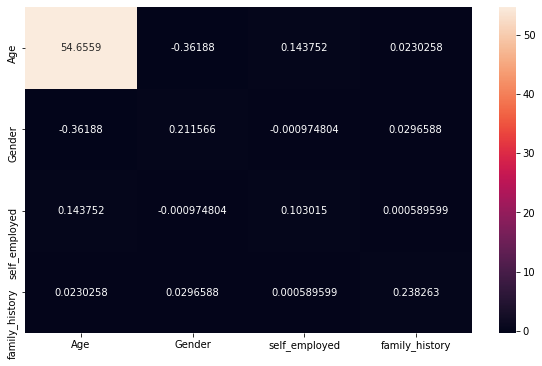

In [34]:
covMatrix = df.iloc[:,0:4].cov()
sns.heatmap(covMatrix,annot=True,fmt='g')
plt.show()

In [35]:
df.to_csv('finalsurvey.csv',header = True,index = False)

In [36]:
x = df.loc[:,df.columns != 'mental_health_consequence']
y = df.loc[:,'mental_health_consequence']
print(x)
print(y)

      Age  Gender  self_employed  family_history  treatment  work_interfere  \
0      46       1              1               1          0             4.0   
1      36       1              1               1          0             0.0   
2      29       1              0               1          1             4.0   
3      31       1              1               0          0             3.0   
4      46       1              0               0          1             1.0   
...   ...     ...            ...             ...        ...             ...   
1231   26       1              0               0          1             0.0   
1232   32       1              0               1          1             1.0   
1233   34       1              0               1          1             4.0   
1234   46       2              0               0          0             0.0   
1235   25       1              0               1          1             4.0   

      no_employees  remote_work  tech_company  bene

In [37]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

In [38]:
x, y = shuffle(x,y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
print(y_train.shape)
print(x_train.shape)

(988,)
(988, 76)


In [40]:
y_train

676     1
18      1
956     2
204     1
1225    1
       ..
855     2
1077    0
393     0
39      0
1102    0
Name: mental_health_consequence, Length: 988, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x = sc.fit_transform(x)

In [42]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [44]:
y_pred = clf.predict(x_test)
MeanScores = []
StdScores = []
MeanScores.append(mean(n_scores))
StdScores.append(std(n_scores))
print(MeanScores)
print(StdScores)

[0.615650406504065]
[0.040867623604240476]


In [45]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(solver='lbfgs',max_iter=10000)
clf2.fit(x_train,y_train)
y_pred2 = clf2.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf2, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
MeanScores.append(mean(n_scores))
StdScores.append(std(n_scores))

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()
clf3.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred3 = clf3.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf3, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
MeanScores.append(mean(n_scores))
StdScores.append(std(n_scores))

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=1000)
clf4.fit(x_train,y_train)
y_pred4 = clf4.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf4, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
MeanScores.append(mean(n_scores))
StdScores.append(std(n_scores))

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors=1)
clf5.fit(x_train,y_train)
y_pred5 = clf5.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf5, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
MeanScores.append(mean(n_scores))
StdScores.append(std(n_scores))

In [50]:
from sklearn.naive_bayes import GaussianNB
clf6 = GaussianNB()
clf6.fit(x_train,y_train)
y_pred6 = clf6.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf6, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
MeanScores.append(mean(n_scores))
StdScores.append(std(n_scores))

In [51]:
from sklearn.ensemble import BaggingClassifier
clf7 = BaggingClassifier()
clf7.fit(x_train,y_train)
y_pred7 = clf7.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf7, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
MeanScores.append(mean(n_scores))
StdScores.append(std(n_scores))

In [52]:
print(MeanScores)
print(StdScores)

[0.615650406504065, 0.6175605385086108, 0.5649663432118194, 0.6672261561325291, 0.5005594894658624, 0.3821313051840196, 0.6324197919398549]
[0.040867623604240476, 0.048572136286312816, 0.042033993839599416, 0.04660039140408232, 0.03846334754749693, 0.047216053154247394, 0.037404760346491754]


In [53]:
names=["SVM","Logistic Regression","Decision Trees","Random Forest","K Nearest Neighbors","Gaussian Naive Bayes","Bagging"]
dfev = pd.DataFrame()
dfev['Algorithm Names'] = names
dfev['Accuracy Scores'] = MeanScores
dfev['Standard Deviation Scores'] = StdScores
dfev

,Algorithm Names,Accuracy Scores,Standard Deviation Scores
0,SVM,0.615650,0.040868
1,Logistic Regression,0.617561,0.048572
2,Decision Trees,0.564966,0.042034
3,Random Forest,0.667226,0.046600
4,K Nearest Neighbors,0.500559,0.038463
5,Gaussian Naive Bayes,0.382131,0.047216
6,Bagging,0.632420,0.037405


In [54]:
cm = sns.light_palette("green", as_cmap=True)
s = dfev.style.background_gradient(cmap=cm)
s

,Algorithm Names,Accuracy Scores,Standard Deviation Scores
0,SVM,0.615650,0.040868
1,Logistic Regression,0.617561,0.048572
2,Decision Trees,0.564966,0.042034
3,Random Forest,0.667226,0.046600
4,K Nearest Neighbors,0.500559,0.038463
5,Gaussian Naive Bayes,0.382131,0.047216
6,Bagging,0.632420,0.037405


In [55]:
plt.rcParams["figure.figsize"] = [8.00, 6.00]

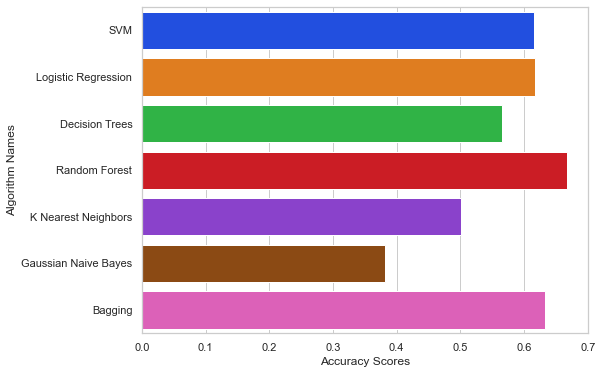

In [56]:
sns.set(style="whitegrid",palette="bright")
ax = sns.barplot(y="Algorithm Names", x="Accuracy Scores", data=dfev)

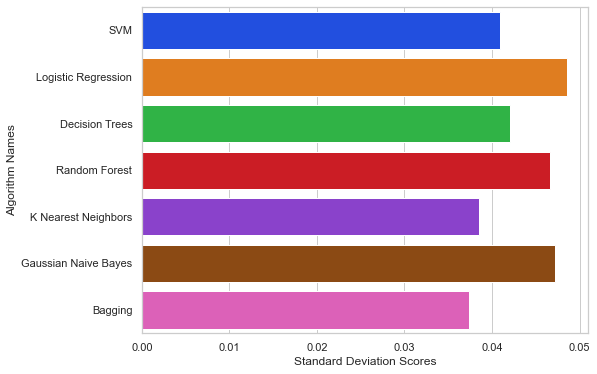

In [57]:
sns.set(style="whitegrid",palette="bright")
ax = sns.barplot(y="Algorithm Names", x="Standard Deviation Scores", data=dfev)

In [58]:
dfres = pd.DataFrame(y_pred4, columns = ['mental_health_consequence'])
dfres = dfres.replace({'mental_health_consequence':{1:'Yes',2:'Maybe',0:'No'}})
print(dfres)
dfres = dfres.value_counts()

    mental_health_consequence
0                          No
1                       Maybe
2                          No
3                          No
4                          No
..                        ...
243                     Maybe
244                     Maybe
245                        No
246                        No
247                        No

[248 rows x 1 columns]


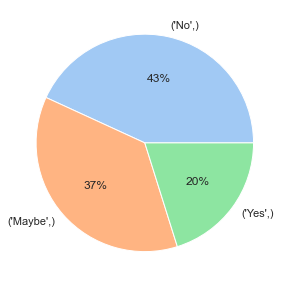

In [59]:
plt.rcParams["figure.figsize"] = [5.00,5.00]
colors = sns.color_palette('pastel')[0:5]
plt.pie(dfres, labels = dfres.keys(), colors = colors, autopct='%.0f%%')
plt.show()

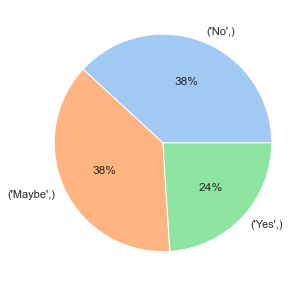

In [60]:
df_train = pd.DataFrame(y_train)
df_train = df_train.replace({'mental_health_consequence':{1:'Yes',2:'Maybe',0:'No'}})
df_train = df_train.value_counts()
plt.rcParams["figure.figsize"] = [5.00,5.00]
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_train, labels = df_train.keys(), colors = colors, autopct='%.0f%%')
plt.show()

## RESULTS
### Highest Accuracy - Random Forest (66.72)
### Lowest Standard Deviation - Bagging (3.74)